# Bagging, Random forests and Boosting

The objective of this pratical is to show the use of bagging, random forests, boosting for classification and regression problems, in python with Sciki-learn. This document freely reproduces some examples presented in the Scikit-learn documentation.

These statistical training algorithms are based on the idea of combining the predictions of several predictors (or classifiers) for a better generalization and to compensate for possible individual predictors defects. 

In general, there are two families of methods of this type:

    1) Methods by averaging (bagging, random forests) where the principle is to average several predictions hoping a better result following the reduction of the variance of the average estimator.

    2) Adaptive methods (boosting) where the parameters are iteratively adapted to produce a better mixture.
    
In the following we will explore each of these algorithm  in Scikit-learn and present some comparisons.

###  Bagging
Bagging builds multiple instances of an estimator, calculated on random samples from the training data (and possibly some of the attributes, also randomly selected), and then combine the individual predictions by averaging them to reduce the variance of the estimator.Their main advantage lies in the fact that they build an improved version of the basic decision trees algorithm, without asking for a modification of this algorithm but it is expensive in computation. As they reduce overfitting, bagging methods work very well with "strong" predictors.

In *Scikit-learn*, bagging methods are implemented via the $BaggingClassifier$ and $BaggingRegressor$ class. The constructors take in parameters an estimator and the strategy of points selection and attributes:

* $base\_estimator$: optional (default = None). If None then the estimator is a decision tree.
* $max\_samples$ : The size of the random sample taken from the training base.
* $max\_features$ : the number of randomly drawn attributes.
* $bootstrap$: boolean, optional (default = True). Draw points with a discount or not.
* $bootstrap\_features$: boolean, optional (default = False). Drawing attributes with a discount or not.
* $oob\_score$: boolean. Estimate or not the OOB (Out of Bag) generalization error.

The following code builds a set of basic classifiers of type $KNeighborsClassifier$, each using a sample of $50\%$ training points and $50\%$ attributes (features):

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In this example, we will use the digits database, which contains 10 classes (handwritten figures images). There are 1797 items, each item has 64 attributes.

(1797, 64)


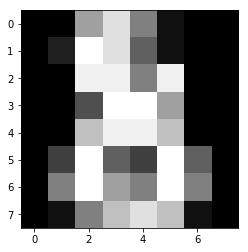

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
# afficher une des images
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(digits.images[1796])
plt.show()

The basic classifier is a decision tree:

In [8]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

digits = load_digits()
X=digits.data
y=digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy=clf.score(X,y)

print (accuracy)

1.0


On the basis of training accuracy = 1. For more realism, we cut the base in training / test in order to see the behavior of the tree on data different from those of training:

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)

print(accuracy)

0.7317676143386898


### Question:

Construct the variance of the value "accuracy" on $200$ draws for the training/test separation. What can we conclude?

To compare, we will build a bagging classifier on our data with a $DecisionTreeClassifier$ base classifier:

In [31]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.2, max_features=0.3, n_estimators=100)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)

print(accuracy)

0.8763906056860321


### Question:

Construct the variance of the value "accuracy" on $100$ draws for the training/test separation. What can we conclude?

## Question:

Vary the $max\_samples$ and $max\_features$. For which values is the best result obtained?

## Random Forest

The random forest algorithm provides optimization of decision trees. It uses the same principle as bagging, but with an additional randomization step in the selection of node attributes in order to reduce the variance of the obtained estimator. The two Python objects that implement random forests are $RandomForestClassifier$ and $RandomForestRegressor$. The most important parameters are:


* $n\_estimators$: integer, optional (default = 10). The number of trees.
* $max\_features$ : the number of attributes to consider at each split.
* $max\_samples$: The size of the random sample taken from the training base.
* $min\_samples\_leaf$: The minimum number of elements in a leaf node.
* $oob\_score$: boolean. Estimate or not the OOB (Out of Bag) generalization error.

We will redo the classification on the Digits database using a classifier $RandomForestClassifier:$

In [49]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import tree
digits = load_digits()
X=digits.data
y=digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)

print(accuracy)

0.9227441285537701


## Question:

How does the value of accuracy compare with the bagging case that uses the same number of trees ($200$ in our case)?

## Question:

Construct the variance of the accuracy value on $100$ draws for the training / test. What can we conclude by comparing with the previous section (bagging)?

## Question:

Look in the documentation for  $ExtraTreesClassifier$ and redo the classification with this type of classifier. Compare with $RandomForestClassifier$. And explain the extract contribution with Extra Tress Classifiers

# Boosting

The principle of boosting is to evaluate a sequence of weak classifiers (weak learners) on several slightly modified versions of the training data. The decisions obtained are then combined by a weighted sum to obtain the final model.

In Scikit-learn it is the $AdaBoostClassifier$ class that implements the algorithm. The most important parameters are:

* $n\_estimators$: integer, optional (default = 10). The number of weak classifiers.
* $learning\_rate$: controls the rate of change of weights by iteration.
* $base\_estimator$: (default = DecisionTreeClassifier) the weak classifier used.

In the following we will redo the classification on the Digits database using a classifier $RandomForestClassifier$:

In [50]:
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
from sklearn import tree
digits = load_digits()
X=digits.data
y=digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)

print (accuracy)

0.88442521631644


### Question:

The $max\_depth$ parameter controls the depth of the tree. Try multiple values to see the impact of using a weaker vs stronger classifier ($max\_depth$ high or eliminate the parameter). Also, test the effect of the $learning\_rate$ parameter and the number of classifiers.